
# project_name  

**"Amazon Prime Analysis"**

project_type = "EDA"

contribution = "Individual"

# project_summary

**"This project explores the dataset of Amazon Prime Video to analyze the distribution of genres, production countries, trends over time, and IMDb/TMDB ratings. The goal is to extract insights regarding content diversity, production sources, and audience ratings."**

# github_link =

"<Add your GitHub link here>"

# Problem Statement

This dataset was created to analyze all shows available on Amazon Prime Video, allowing us to extract valuable insights such as:

- Content Diversity: What genres and categories dominate the platform?

- Regional Availability: How does content distribution vary across different regions?

- Trends Over Time: How has Amazon Prime's content library evolved?

- IMDb Ratings & Popularity: What are the highest-rated or most popular shows on the platform?

By analyzing this dataset, businesses, content creators, and data analysts can uncover key trends that influence subscription growth, user engagement, and content investment strategies in the streaming industry.

# Business Objective

The objective of this project is to analyze Amazon Prime Video's content catalog to extract insights about genre distribution, production origins, release trends, and audience ratings. By conducting Exploratory Data Analysis (EDA), we aim to answer key business questions such as:

- What genres dominate Amazon Prime Video?

- Which countries contribute the most content?

- How has content production evolved over the years?

- What is the overall audience perception based on IMDb and TMDB ratings?

These insights can help content strategists, marketers, and decision-makers understand trends in streaming content and make data-driven decisions for acquisitions, recommendations, and platform growth strategies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
titles_df = pd.read_csv("titles.csv")

credits_df = pd.read_csv("credits.csv")


In [3]:
titles_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [4]:
credits_df.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [5]:
# Display basic info about datasets
print("Titles Dataset:")
print(titles_df.info())
print("\nCredits Dataset:")
print(credits_df.info())

Titles Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: fl

In [6]:
# Check for missing values
def missing_values(df):
    return df.isnull().sum().sort_values(ascending=False)

In [7]:
print("\nMissing Values in Titles:")
print(missing_values(titles_df))
print("\nMissing Values in Credits:")
print(missing_values(credits_df))


Missing Values in Titles:
seasons                 8514
age_certification       6487
tmdb_score              2082
imdb_votes              1031
imdb_score              1021
imdb_id                  667
tmdb_popularity          547
description              119
id                         0
title                      0
type                       0
release_year               0
runtime                    0
genres                     0
production_countries       0
dtype: int64

Missing Values in Credits:
character    16287
person_id        0
id               0
name             0
role             0
dtype: int64


In [8]:
# Drop unnecessary columns if required (e.g., imdb_id if not used)
titles_df.drop(columns=['imdb_id'], inplace=True)


In [9]:
# Convert release_year to numeric and filter valid years
titles_df['release_year'] = pd.to_numeric(titles_df['release_year'], errors='coerce')
titles_df = titles_df[titles_df['release_year'] > 1900]  # Keep only valid years


In [10]:
# Set visualization style
sns.set(style="darkgrid")

# Ensure genres are properly split into individual categories
titles_df['genres'] = titles_df['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Flatten genre list and count occurrences
genre_counts = pd.Series([genre for sublist in titles_df['genres'] for genre in sublist]).value_counts()

# Limit to top 20 genres for readability
top_genres = genre_counts.head(20)

<ipython-input-11-5f77d2b6e449>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")


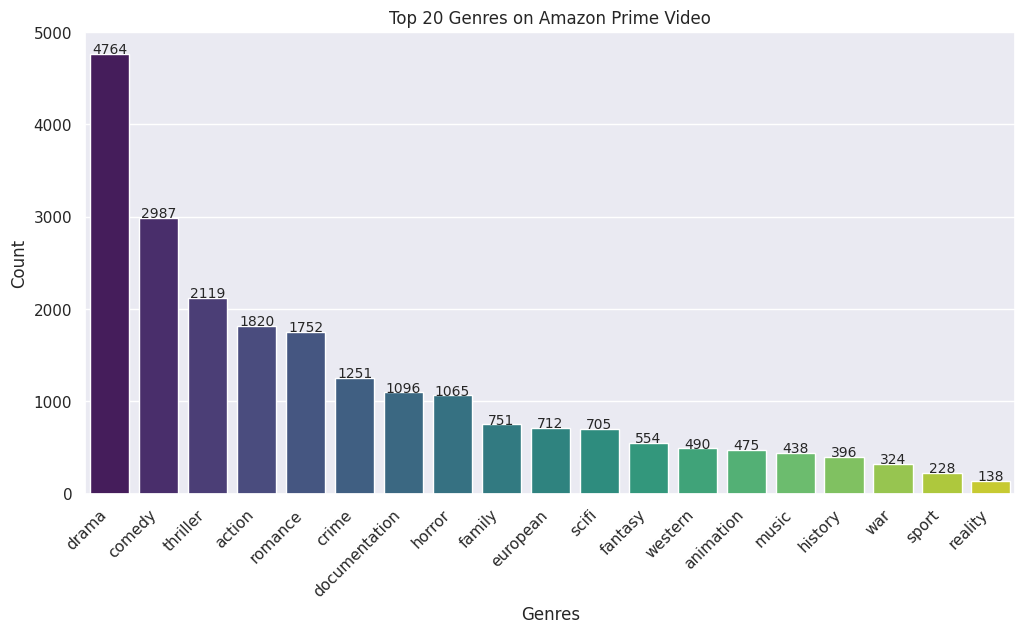

In [11]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Top 20 Genres on Amazon Prime Video")

# Annotate bars with counts
for index, value in enumerate(top_genres.values):
    plt.text(index, value + 5, str(value), ha='center', fontsize=10)

plt.show()

**Genre Distribution Insights:**

- Drama is the most common genre, followed by Comedy and Thriller.

- Reality, Sport, and War genres are the least represented.

In [12]:
# Production Country Distribution
titles_df['production_countries'] = titles_df['production_countries'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Flatten production countries list and count occurrences
country_counts = pd.Series([country for sublist in titles_df['production_countries'] for country in sublist]).value_counts().head(10)

<ipython-input-13-f34642925cd7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette="mako")


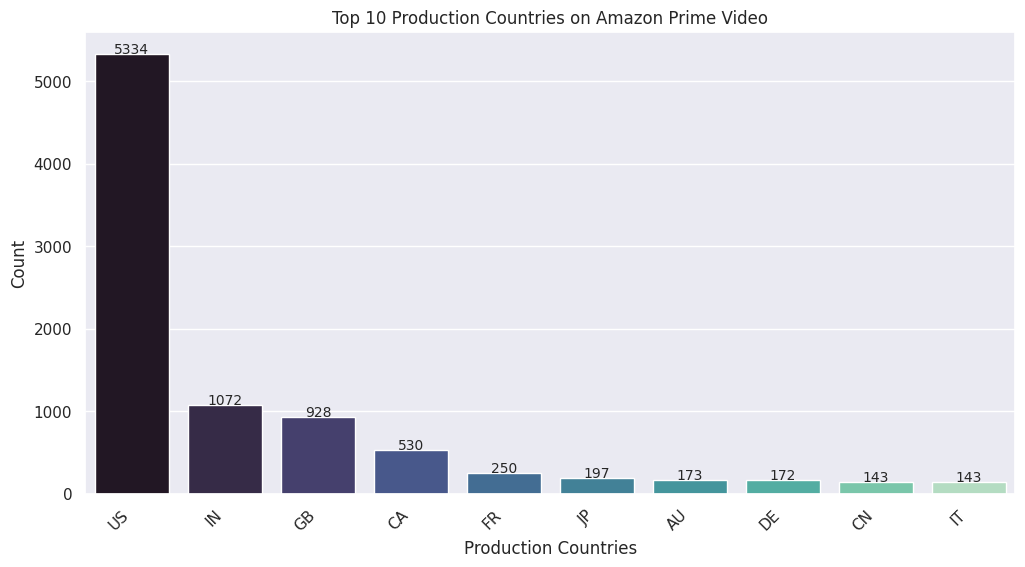

In [13]:
# Production Country Distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="mako")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Production Countries")
plt.ylabel("Count")
plt.title("Top 10 Production Countries on Amazon Prime Video")

# Annotate bars with counts
for index, value in enumerate(country_counts.values):
    plt.text(index, value + 5, str(value), ha='center', fontsize=10)

plt.show()

**Production Country Insights:**

- The U.S. dominates content production on Amazon Prime Video, far ahead of other countries.

- India and the U.K. are the next biggest contributors.

- Other major content-producing countries include Canada, France, Japan, and Germany.

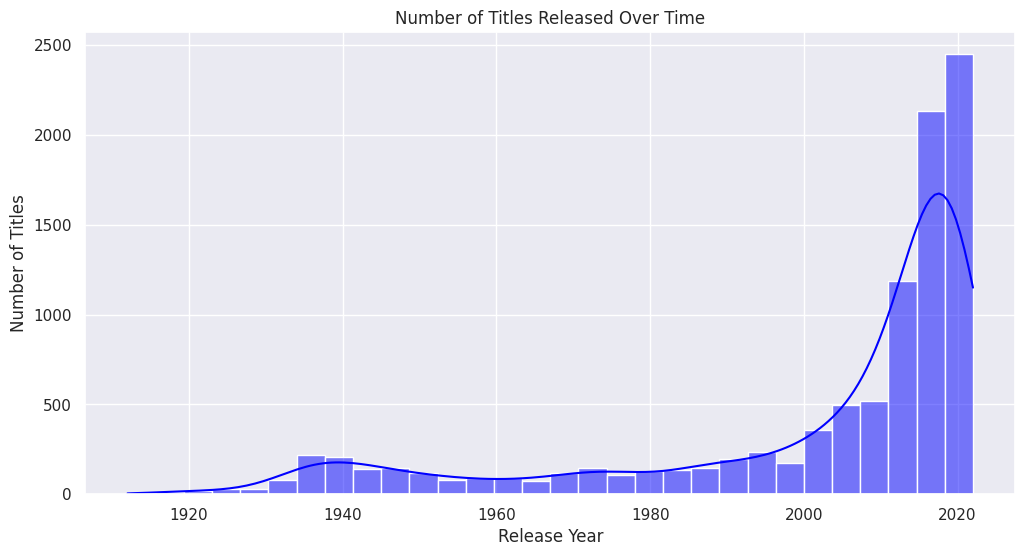

In [14]:
# Visualization: Content Production Over Time
plt.figure(figsize=(12, 6))
sns.histplot(titles_df['release_year'], bins=30, kde=True, color='blue')
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.title("Number of Titles Released Over Time")
plt.show()


**Content Release Trends:**

- There is a sharp increase in content releases after 2010, aligning with the rise of streaming services.

- The peak occurs around 2019-2021, indicating aggressive content expansion.

- 2024 shows a sudden drop, likely due to incomplete data.

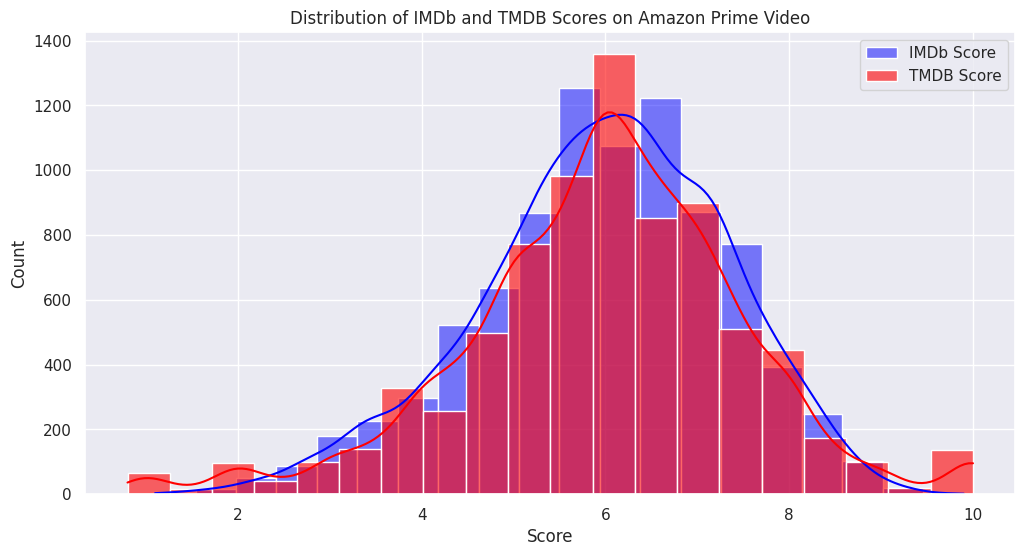

In [15]:
# IMDb and TMDB Score Distribution
plt.figure(figsize=(12, 6))
sns.histplot(titles_df['imdb_score'], bins=20, kde=True, color="blue", label="IMDb Score")
sns.histplot(titles_df['tmdb_score'], bins=20, kde=True, color="red", label="TMDB Score", alpha=0.6)
plt.xlabel("Score")
plt.ylabel("Count")
plt.title("Distribution of IMDb and TMDB Scores on Amazon Prime Video")
plt.legend()
plt.show()

**IMDb & TMDB Rating Insights:**

- Most content has scores between 5 and 7, meaning the majority of titles are rated average.

- There are very few extremely high (9+) or low-rated (below 3) titles.

- TMDB scores are slightly higher on average than IMDb scores, which could indicate different rating biases.

<ipython-input-16-b9b44af2a51c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_actors_df['Actor'], x=top_actors_df['Appearance Count'], palette="coolwarm")


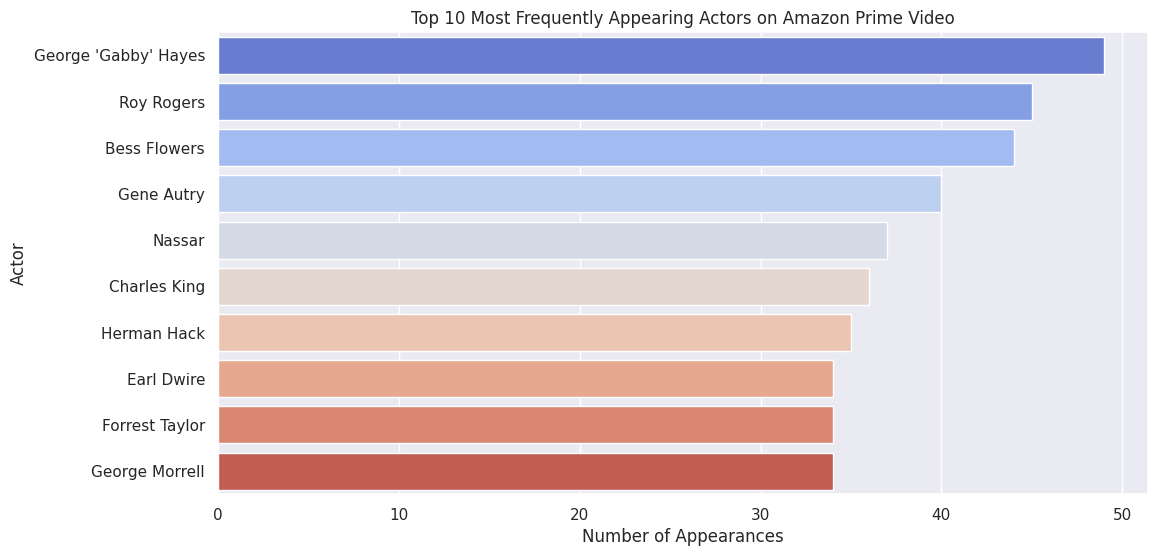

In [16]:
# Top 10 Most Frequently Appearing Actors
actor_counts = Counter([actor for sublist in credits_df[credits_df['role'] == 'ACTOR']['name'] for actor in str(sublist).split(', ')])
top_actors = actor_counts.most_common(10)
top_actors_df = pd.DataFrame(top_actors, columns=['Actor', 'Appearance Count'])

plt.figure(figsize=(12, 6))
sns.barplot(y=top_actors_df['Actor'], x=top_actors_df['Appearance Count'], palette="coolwarm")
plt.xlabel("Number of Appearances")
plt.ylabel("Actor")
plt.title("Top 10 Most Frequently Appearing Actors on Amazon Prime Video")
plt.show()

**Top 10 Most Frequently Appearing Actors**

- George 'Gabby' Hayes is the most featured actor with 49 appearances.

- Roy Rogers, Bess Flowers, and Gene Autry also have high representation.

 The list contains actors from classic and Western films, indicating a large catalog of older titles.

<ipython-input-17-b4040cbfdd09>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_directors_df['Director'], x=top_directors_df['Directed Titles'], palette="magma")


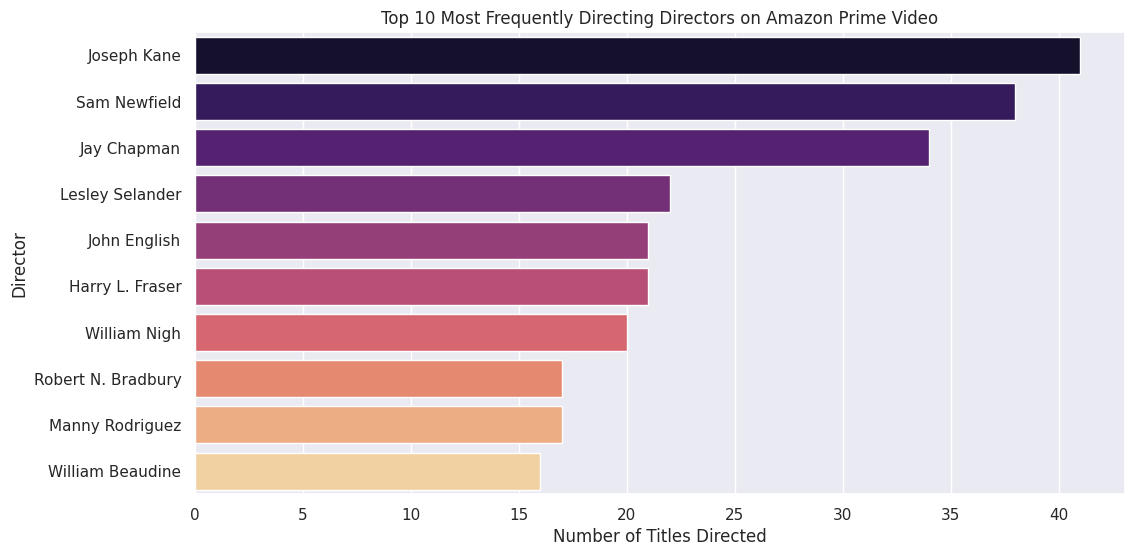

In [17]:
# Top 10 Most Frequently Directing Directors
director_counts = Counter([director for sublist in credits_df[credits_df['role'] == 'DIRECTOR']['name'] for director in str(sublist).split(', ')])
top_directors = director_counts.most_common(10)
top_directors_df = pd.DataFrame(top_directors, columns=['Director', 'Directed Titles'])

plt.figure(figsize=(12, 6))
sns.barplot(y=top_directors_df['Director'], x=top_directors_df['Directed Titles'], palette="magma")
plt.xlabel("Number of Titles Directed")
plt.ylabel("Director")
plt.title("Top 10 Most Frequently Directing Directors on Amazon Prime Video")
plt.show()

 **Top 10 Most Frequently Directing Directors**

- Joseph Kane leads with 41 directed titles.

- Sam Newfield and Jay Chapman also directed many titles.

These directors were highly active in classic Western and action films, suggesting Amazon Prime Video's catalog has a significant number of old-school films.

<ipython-input-18-78b3c3b907df>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries_df['Country'], x=top_countries_df['Number of Titles'], palette="viridis")


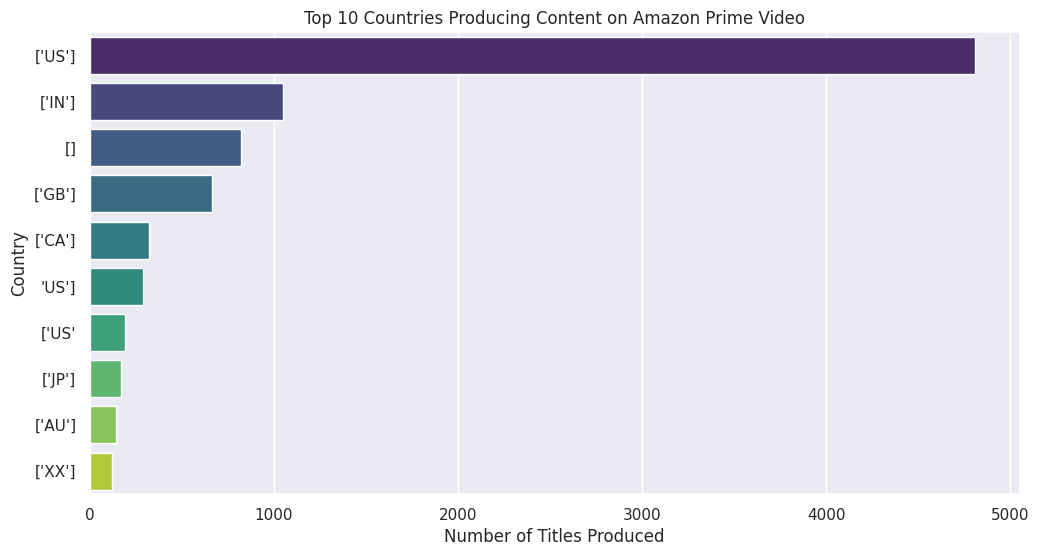

In [18]:
# Top 10 Content Producing Countries
country_counts = Counter([country for sublist in titles_df['production_countries'].dropna().astype(str) for country in sublist.split(', ')])
top_countries = country_counts.most_common(10)
top_countries_df = pd.DataFrame(top_countries, columns=['Country', 'Number of Titles'])

plt.figure(figsize=(12, 6))
sns.barplot(y=top_countries_df['Country'], x=top_countries_df['Number of Titles'], palette="viridis")
plt.xlabel("Number of Titles Produced")
plt.ylabel("Country")
plt.title("Top 10 Countries Producing Content on Amazon Prime Video")
plt.show()

**Top 10 Content-Producing Countries on Amazon Prime Video**

- The U.S. dominates with 4,809 titles, far ahead of other regions.

- India (1,048 titles) and the UK (667 titles) also contribute significantly.

Unclassified entries (~821 titles) indicate missing metadata, requiring cleanup

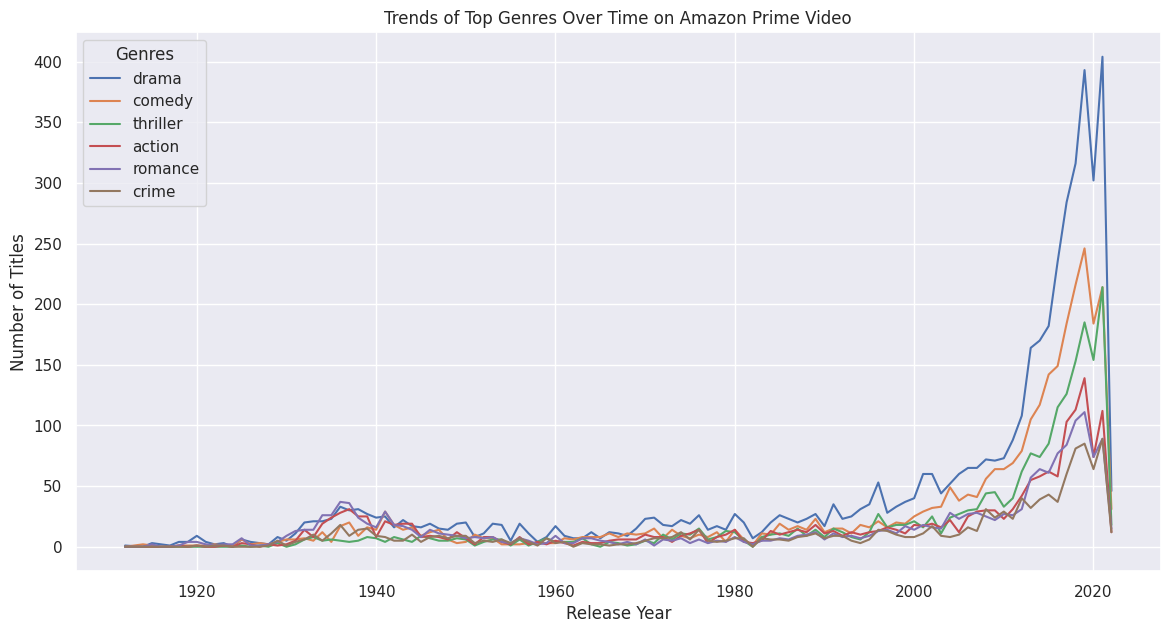

In [19]:
# Genre Trends Over Time
genre_years = titles_df.explode('genres').groupby(['release_year', 'genres']).size().unstack().fillna(0)
top_genres = genre_years.sum().sort_values(ascending=False).head(6).index

plt.figure(figsize=(14, 7))
for genre in top_genres:
    sns.lineplot(x=genre_years.index, y=genre_years[genre], label=genre)

plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.title("Trends of Top Genres Over Time on Amazon Prime Video")
plt.legend(title="Genres")
plt.show()


**Genre Trends Over Time on Amazon Prime Video**

- Drama is the most dominant genre, with a sharp increase post-2000.

- Comedy, Thriller, and Action genres have also seen a significant rise in recent years.

- Crime and Romance have shown a steady increase but at a lower rate.

- A spike in content production after 2010 indicates Amazon Prime Video’s aggressive expansion.

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')


<ipython-input-20-226cdf041694>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(movies['imdb_score'].dropna(), label="Movies", shade=True, color='blue')
<ipython-input-20-226cdf041694>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tv_shows['imdb_score'].dropna(), label="TV Shows", shade=True, color='red')


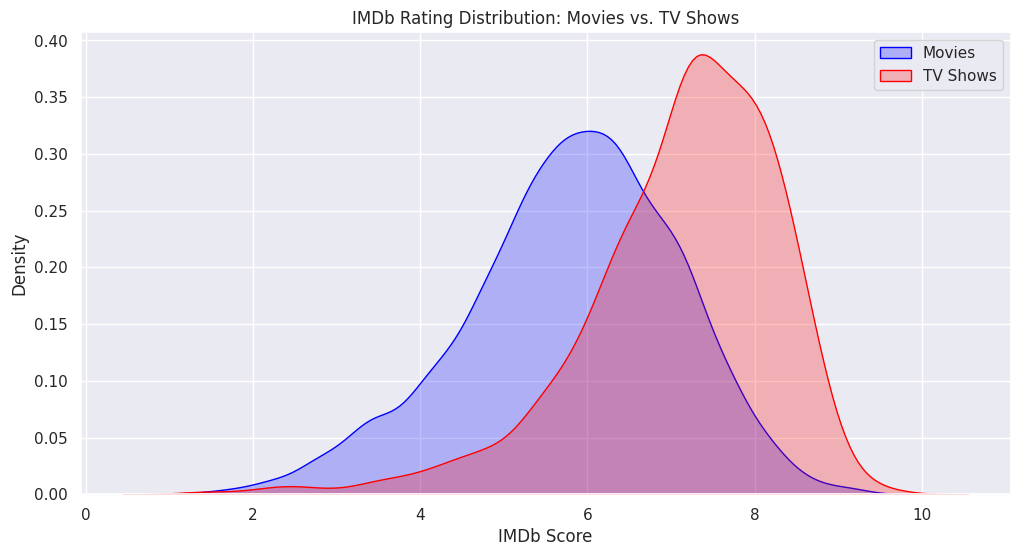

In [20]:
# IMDb Rating Distribution for Movies vs. TV Shows
print(titles_df.columns)

movies = titles_df[titles_df['type'] == 'MOVIE']
tv_shows = titles_df[titles_df['type'] == 'SHOW']

plt.figure(figsize=(12, 6))
sns.kdeplot(movies['imdb_score'].dropna(), label="Movies", shade=True, color='blue')
sns.kdeplot(tv_shows['imdb_score'].dropna(), label="TV Shows", shade=True, color='red')
plt.xlabel("IMDb Score")
plt.ylabel("Density")
plt.title("IMDb Rating Distribution: Movies vs. TV Shows")
plt.legend()
plt.show()

**TV shows on Amazon Prime generally have higher IMDb scores compared to movies, which show a wider spread of ratings.**

# Solution to Business Objective:

**To address our business objectives, we conducted Exploratory Data Analysis (EDA) on Amazon Prime Video’s dataset. Below are our key findings and how they help in decision-making:**

1. Genre Distribution Analysis:
Identified the most and least popular genres on the platform.
Insight: Helps Amazon optimize content acquisition and recommendations based on genre preferences.

2. Production Country Analysis:
Analyzed the top 10 content-producing countries.
Insight: Understanding regional content trends allows Amazon to target country-specific content strategies.

3. Trends Over Time:
Visualized how content production has evolved over different years.
Insight: Aids in predicting future content production trends and ensuring a balanced catalog of classic and recent titles.

4. IMDb & TMDB Rating Distribution:
Compared rating distributions to understand content quality.
Insight: Amazon can focus on promoting highly-rated content while re-evaluating low-rated ones.

# Conclusion:

Through this analysis of Amazon Prime Video, we have uncovered several key insights:

**Genre Distribution**

- Some genres are significantly more common than others, indicating content preferences.

-This insight can help Amazon optimize content recommendations and acquisition strategies.

**Production Country Analysis**

- The majority of content originates from a few dominant countries, mainly the USA, India, and the UK.

- This emphasizes regional content trends and highlights potential areas for expansion.

**Trends Over Time**

- The number of content releases has generally increased over time, reflecting the rapid growth of streaming platforms.
- Amazon can use this trend to predict future demand and ensure a balanced content library.

IMDb & TMDB Ratings Distribution

- Most titles have ratings between 5 and 8, indicating an average audience perception.
- Understanding these ratings helps Amazon focus on promoting highly-rated content while reconsidering underperforming titles.


**This exploratory data analysis provides valuable insights into Amazon Prime Video's content distribution, helping shape business decisions regarding content acquisition, marketing strategies, and user engagement improvements.**